In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import scipy.stats as st



In [2]:
data = pd.read_csv("data_set.csv")

In [3]:
#Delete duplicates
data.drop_duplicates(inplace=True, ignore_index=True)
data.duplicated().sum()

np.int64(0)

In [4]:
#Transform sex variable from string to int
data["sex"] = data["sex"].apply(lambda x : 1 if x == "male" else 0)

In [5]:
#Transform smoker variable from string to int
data["smoker"] = data["smoker"].apply(lambda x : 1 if x == "yes" else 0)

In [6]:
#create new columns
data["is_southwest"] = ""
data["is_southeast"] = ""
data["is_northwest"] = ""
data["is_northeast"] = ""

In [7]:
#One Hot Encoding of region column
for x in range(0, data.shape[0]):
    data.loc[x, "is_southwest"] = 1 if data.loc[x, "region"] == "southwest" else 0
    data.loc[x, "is_southeast"] = 1 if data.loc[x, "region"] == "southeast" else 0
    data.loc[x, "is_northwest"]= 1 if data.loc[x, "region"] == "northwest" else 0
    data.loc[x, "is_northeast"] = 1 if data.loc[x, "region"] == "northeast" else 0

data["is_southwest"] = pd.to_numeric(data["is_southwest"], errors="coerce")
data["is_southeast"] = pd.to_numeric(data["is_southeast"], errors="coerce")
data["is_northwest"] = pd.to_numeric(data["is_northwest"], errors="coerce")
data["is_northeast"] = pd.to_numeric(data["is_northeast"], errors="coerce")



In [8]:
data.drop(["region"], axis=1, inplace=True)

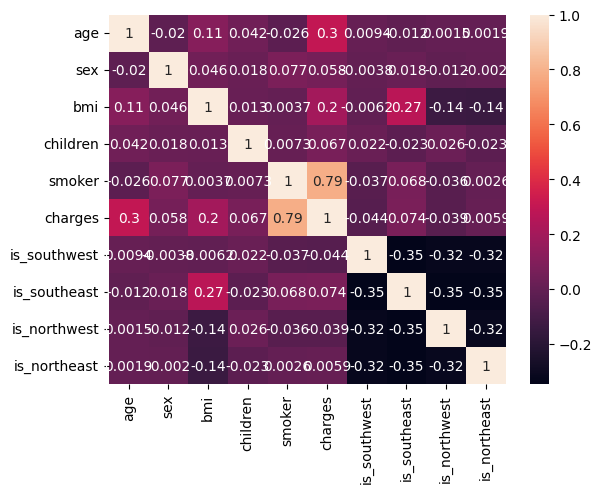

In [9]:
df_corr = data.corr()

sb.heatmap(df_corr, annot=True)
plt.title = "Heatmap"
plt.show()

In [10]:
st.pearsonr(data["smoker"],data["charges"])[0]

np.float64(0.7872343672800317)

In [11]:
data.to_csv("cleaned_dataset.csv", index=False)

In [12]:
from scipy.stats import spearmanr, pearsonr

for i in range(len(data.columns)):
    r,p_value = pearsonr(data['charges'], data[str(data.columns[i])])
    if p_value < 0.05:
        print(f"\033[31mCoefficient de corrélation de Pearson entre la charge et la variable et {data.columns[i]}: {r}")
        print(f"\033[31mP-valeur: {p_value}\033[0m ")
        print('=======================================')
        print('')
    else:
        print(f"Coefficient de corrélation de Pearson entre la charge et la variable et {data.columns[i]}: {r}")
        print(f"P-valeur: {p_value}")
        print('=======================================')
        print('')

Coefficient de corrélation de Pearson entre la charge et la variable et age: 0.29830821250978645
P-valeur: 6.975748762691051e-29 

Coefficient de corrélation de Pearson entre la charge et la variable et sex: 0.05804449579031286
P-valeur: 0.03382079199512013 

Coefficient de corrélation de Pearson entre la charge et la variable et bmi: 0.19840083122624935
P-valeur: 2.4680404264513685e-13 

Coefficient de corrélation de Pearson entre la charge et la variable et children: 0.06738935083963249
P-valeur: 0.013717026292987116 

Coefficient de corrélation de Pearson entre la charge et la variable et smoker: 0.7872343672800317
P-valeur: 1.4067220949377421e-282 

Coefficient de corrélation de Pearson entre la charge et la variable et charges: 1.0
P-valeur: 0.0 

Coefficient de corrélation de Pearson entre la charge et la variable et is_southwest: -0.04363736849776149
P-valeur: 0.11074172538700673

Coefficient de corrélation de Pearson entre la charge et la variable et is_southeast: 0.07357792870